In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values # training data consists of the second column i.e Open

In [3]:
# Feature Scaling - normalize training data for easier data processing 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range =(0,1)) #i.e from 0 to 1
training_set_scaled = sc.fit_transform(training_set)

This next step is abit complicated but very crutial. LSTM (Long-Short Term Memory) is a artificial RNN architecture used for time-series prediction. 

The input to every LSTM layer must be three-dimensional. Therefore we have to convert the training data (1D) to a 3D array then input it to the neural network. To achieve this 
the np.reshape method is used.

The three dimensions of this input are:

a. Samples - One sequence is one sample. A batch is comprised of one or more samples.
d. Time Steps - One time step is one point of observation in the sample.
c. Features - One feature is one observation at a time step.

For more information follow the link https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/

In [4]:
# Creating a data structure with 60 timesteps and 1 output/feature
x_train = []
y_train =[]
for i in range(60,1258): # you can change the value 1258 according to the records/rows you have on your training data
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [5]:
# To see the reshaped values
print(x_train.shape)
print(x_train.shape[0])
print(x_train.shape[1])
print(x_train.shape[2])

(1198, 60, 1)
1198
60
1


In [6]:
# Importing the Keras libraries and packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


The next step is setting up the neural network.

Hyperparameters are parameters whose value is used to control the learning process of the model. These include:
a. Units - these are number of neurons in a layer
b. Dropout - percentage number of neurals that are set aside in a layer inorder to "learn" 

Note: These are the only values you can change/tune.

In [7]:
# Initialising the RNN
regressor = Sequential()

In [8]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape =(x_train.shape[1], 1))) #Note the input shape is the shape we got from reshaping i.e 60 time steps and 1 output/feature
regressor.add(Dropout(0.2))

# Adding the second LSTM layer and same Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the third LSTM layer and same Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the fourth LSTM layer and same Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer

regressor.add(Dense(units = 1)) # Note the output layer unit must be 1

Next, we compile the neural network. Depending on the type of model and output expected, different types of optimizers & loss functions are used. For Linear Regression we will
use adam optimizer and mean squared error loss function.

For more infomation on this visit https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/  &  https://heartbeat.fritz.ai/an-empirical-comparison-of-optimizers-for-machine-learning-models-b86f29957050

In [9]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [10]:
# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs = 200, batch_size=32)

Epoch 1/200
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0500
Epoch 2/200
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0059
Epoch 3/200
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0056
Epoch 4/200
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 5/200
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0057
Epoch 6/200
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 7/200
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 8/200
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 9/200
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 10/200
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 11/200
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 12/200
1198/1198 [==============================] - 5s 4ms/step - lo

In [11]:
# Making predictions and visualizing
# Getting the real stock price of 2017

#Importing the testing set
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [15]:
# Getting the predicted stock price of 2017

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 80):# you can change the value 80 according to the records/rows you have on your testing data
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#Get prediction
predicted_stock_price = regressor.predict(x_test)
# 'De-normalize' the data
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

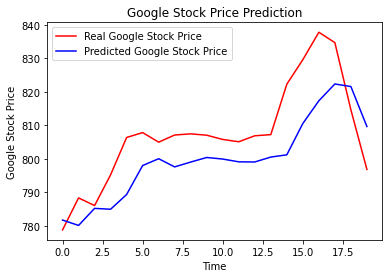

In [13]:
# Visualize the results

plt.plot(real_stock_price, color= 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()